# データの要約

このセクションでは、SASでの探索的データ分析の基本を学びます。カテゴリー変数、量的変数、および2変量データの基本的な要約を学びます。数値およびグラフによる要約の両方をカバーします。後のセクションでは、プレゼンテーション用にグラフの外観を改善するためプロットを扱います。

SASには、さまざまな記述統計量を生成し、理解しやすいレポートで表示するように特別に設計された多くのプロシージャがあります。特に利用するものとしては、MEANS、SUMMARY、UNIVARIATE、およびFREQプロシージャの4つです。

FREQプロシージャは、離散データ値を要約するために使用されます。したがって、青い目をした人の割合や、立ち枯れ病に罹ったニレの木の数を計算するのに使用できます。

MEANS、SUMMARY、およびUNIVARIATEプロシージャは、連続的な数値を要約するために使用され、したがって、平均身長、中央給与、最小走行距離などの統計量を計算するのに使用できます。

主にはMEANSプロシージャを使用し、SUMMARYおよびUNIVARIATEプロシージャにはMEANSプロシージャと共通のオプションおよびステートメントがあるため時間はあまりかけません。3つのプロシージャの最大の違いは、UNIVARIATEプロシージャがMEANSおよびSUMMARYプロシージャでは利用できないいくつかの統計量を計算できることです。ただし、これらの統計量を計算する必要がない場合は、MEANSおよびSUMMARYプロシージャを使用するほうが効率的です。

3つのプロシージャはすべて、次の一般的な形式をとります。

```
proc procname options;
  statement1;
  statement2;
  etc;
run;
```

ここで、当然ながらPROCNAMEはプロシージャの名前を表し、したがってMEANS、SUMMARY、またはUNIVARIATEのいずれかになります。

プロットについては、主にPROC SGPLOTを使用します。

<!-- 
# Data Summarization

In this section, we will learn the basics of exploratory data analysis in SAS. We will learn how to summarize one categorical variable, one quantitative variable, and basic summaries of bivariate data. We will cover both numeric and graphical summaries. In a later section, we will return to plotting to improve the appearance of our plots for presentations.

There are a number of procedures that are available in SAS that are designed specifically to produce a variety of different descriptive statistics and to display them in meaningful reports. The four procedures in particular, of which I am thinking, are the MEANS, SUMMARY, UNIVARIATE, and FREQ procedures.

The FREQ procedure is used to summarize discrete data values, and therefore can be used to calculate summary statistics such as the percentage of people with blue eyes and the number of elm trees succumbing to Dutch elm disease.

The MEANS, SUMMARY, and UNIVARIATE procedures are used to summarize continuous numeric values, and therefore can be used to calculate statistics, such as mean height, median salary, and minimum mileage. 

We'll work mostly with the MEANS procedure. Then, since the SUMMARY and UNIVARIATE procedures have similar options and statements as the MEANS procedure, we'll spend less time on them. The greatest difference between the three procedures is that the UNIVARIATE procedure calculates a few more additional statistics not available in the MEANS and SUMMARY procedures. If you do not need to calculate the additional statistics that are available in UNIVARIATE, however, it is much more efficient to use the MEANS and SUMMARY procedures.

All three of the procedures take the following generic form:

```    
PROC PROCNAME options; 
     statement1;
     statement2;
     etc;
RUN;
```    

where, not surprisingly, PROCNAME stands for the name of the procedure, and is therefore — either MEANS, SUMMARY, or UNIVARIATE.

For plotting, we will mainly focus on using PROC SGPLOT.
-->

## 量的データの要約

MEANS、SUMMARY、およびUNIVARIATEプロシージャを扱うにあたり、ICDB研究から得られた血液学データセットhem2.sas7bdat(READMEを参照)を使用します。次のプログラムは、SASにデータセットについて情報とデータセットの最初の15オブザベーションを表示するよう指示しています。

<!-- 
## Summarizing Quantitative Data

Throughout our investigation of the MEANS, SUMMARY, and UNIVARIATE procedures, we'll use the hemotology dataset, hem2.sas7bdat (see CANVAS for the dataset), arising from the ICDB Study. The following program tells SAS to display the contents, and print the first 15 observations, of the data set:
-->

In [1]:
libname phc6089 '/folders/myfolders/SAS_Notes/data/';
 
proc contents data = phc6089.hem2 position;
run;
 
proc print data = phc6089.hem2 (obs = 15);
run;

最初に、血液学データセットをPC上の任意の場所にダウンロードして保存します。次にプログラムを開き、LIBNAMEステートメントを編集して、データセットを保存した場所を反映させます。最後に、プログラムを実行します。上記のような出力が表示されるはずです。

最初の2つの変数「subj」 と「hosp」は、それぞれ被験者番号とデータが収集された病院を示します。残りの変数「wbc」、「rbc」、「hemog」、...は、最も関心のある血液データ変数です。たとえば、変数「wbc」と「rbc」はそれぞれ被験者の白血球数と赤血球数を含んでいます。出力を確認する際に注目すべき重要なことは、すべての血液データ変数が連続的な数値変数ということであり、したがってMEANSプロシージャによる記述統計に適しているということです。

<!-- 
First, download and save the hematology data set to a convenient location on your computer. Then, launch the SAS program, and edit the LIBNAME statement so that it reflects the location in which you saved the data set. Finally, run the program. You may recall that the CONTENTS procedure's POSITION option tells SAS to display the contents of the data set in the order in which the variables appear in the data set. Therefore, you should see output that looks something like what is shown above.

The first two variables, subj and hosp, tell us the subject number and at what hospital the subject's data were collected. The remaining variables, wbc, rbc, hemog, ... are the blood data variables of most interest. For example, the variables wbc and rbc contain the subject's white blood cell and red blood cell counts, respectively. The really important thing to note when reviewing the output is that all of the blood data variables are continuous numeric variables, which lend themselves perfectly to a descriptive analysis using the MEANS procedure.
-->

### MEANSおよびSUMMARYプロシージャ

このセクションでは、基本的なMEANSおよびSUMMARYプロシージャの構文を確認し、それらが生成する出力に慣れましょう。

### 例

MEANSプロシージャでは様々なステートメントとオプションにより統計量を出力できます。単純にするために最も基本的な形から始めましょう。
以下のプログラムはデータセットphc6089.hem2の各数値変数について、基本的な統計量を出力します。

<!-- 
### The MEANS and SUMMARY Procedures

In this section, we'll learn the syntax of the simplest MEANS and SUMMARY procedures, as well as familiarize ourselves with the output they generate.

### Example

The MEANS procedure can include many statements and options for specifying the desired statistics. For the sake of simplicity, we'll start out with the most basic form of the MEANS procedure. The following program simply tells SAS to display basic summary statistics for each numeric variable in the phc6089.hem2 data set:  
-->

In [2]:
proc means data = phc6089.hem2;
run;

プログラムを開いて実行し、MEANSおよびSUMMARYプロシージャによる出力を確認してください。デフォルトでMEANSプロシージャは、N(欠損値ではない値の数)、平均、標準偏差、最小値、最大値を表示します。
ほとんどの場合ではデータセット内のすべての数値変数に対する要約統計は不要で、いくつかの重要な変数に焦点を当てたいと思うでしょう。たとえば、血液学データセットの場合、subjおよびhosp変数に対してSASが要約統計を計算するのはあまり意味がありません。結局のところ、平均のsubj番号が327199.5であることがわかっても、役に立つでしょうか？
<!-- 
Launch and run the SAS program, and review the output to familiarize yourself with the summary statistics that the MEANS procedure calculates by default. As you can see, in its most basic form, the MEANS procedure prints N (the number of nonmissing values), the mean, the standard deviation, and the minimum and maximum values of every numeric variable in the data set.  
In most cases, you probably don't want SAS to calculate summary statistics for every numeric variable in your data set. Instead, you'll probably just want to focus on a few important variables. For our hematology data set, for example, it doesn't make much sense for SAS to calculate summary statistics for the subj and hosp variables. After all, how does it help us to know that the average subj number is 327199.5?  
-->

### 例

以下のプログラムではMEANSプロシージャのVARステートメントにより、icdb.hem2 から7つの変数のみに限定して統計量を算出しています。

<!-- 
### Example

The following program uses the MEANS procedure's VAR statement to restrict SAS to summarizing just the seven blood data variables in the icdb.hem2 data set:  
 -->

In [3]:
proc means data = phc6089.hem2;
  var wbc rbc hemog hcrit mcv mch mchc;
run;

プログラムを開いて実行し、出力を見て「subj」と「hosp」が分析から除外されていることを確認してください。  
出力については、他にも気になる点があります。デフォルトでは、SASはMEANSプロシージャで作成されたレポートに値を表示するためにbest.形式を使用します。技術的には、これはSASが要約統計情報を最大限に提供しつつ、デフォルトのフィールド幅を12に保つ形式を選択することを意味します。実際には、しばしば不要な多くの小数点以下が表示されることがあります。

<!-- 
Launch and run the SAS program, and review the output to convince yourself that the `subj` and `hosp` variables have been excluded from the analysis.  
The other thing you might notice about the output is that there are many more decimal places displayed than are necessary. By default, SAS uses the best. format to display values in reports created by the MEANS procedure. In a technical sense, it means that SAS chooses the format that provides the most information about the summary statistics while maintaining a default field width of 12. In a practical sense, it means that often too many decimal places are displayed.  
-->

### 例

以下のプログラムは、前のプログラムと同じですが、2つの点が異なります：

* MEANSキーワードはSUMMARYキーワードに置き換えられました
* PROCステートメントにPRINTオプションが追加されました

<!-- 
### Example

The following program is identical to the program in the previous example except for two things:  

1. The MEANS keyword has been replaced with the SUMMARY keyword
2. The PRINT option has been added to the PROC statement.
-->

In [4]:
proc summary data = phc6089.hem2 maxdec = 2 fw = 10 print;
  var wbc rbc hemog hcrit mcv mch mchc;
run;

MEANSとSUMMARYプロシージャは、PRINTオプションのデフォルト設定を除いて同じ機能を実行します。デフォルトでは、MEANSプロシージャは出力を生成し、SUMMARYプロシージャは生成しません。MEANSプロシージャでは、出力を抑制するにはNOPRINTオプションを使用する必要がありますが、SUMMARYプロシージャでは印刷されたレポートを取得するにはPRINTオプションを使用する必要があります。  
プログラムを開いて実行し、MEANSプロシージャとSUMMARYプロシージャによって作成された2つのレポート間には違いがないことを確認してください。  
実際には違いがあります。上記のプログラムのVARステートメントは、SASにどの（数値）変数を要約するかを指示します。SUMMARYプロシージャにVARステートメントを含めない場合、SASはデータセット内の単純なオブザベーションのカウントを提供します。このことを確認するために、VARステートメントを削除し、再度プログラムを実行してみてください。出力は次のようになります：
<!-- 
The MEANS and SUMMARY procedures perform the same functions except for the default setting of the PRINT option. By default, the MEANS procedure produces printed output, while the SUMMARY procedure does not. With the MEANS procedure, you have to use the NOPRINT option to suppress printing, while with the SUMMARY procedure, you have to use the PRINT option to get a printed report.  
Launch and run the SAS program, and review the output to convince yourself that there is no difference between the two reports created by the MEANS and SUMMARY procedures.  
There is actually a difference. The VAR statement in the above program tells SAS which of the (numeric) variables to summarize. If you do not include a VAR statement in the SUMMARY procedure, SAS merely gives a simple count of the number of observations in the data set. To convince yourself of this, delete the VAR statement, and re-run the SAS program. You should see output that looks something like this:  
-->

In [5]:
proc summary data = phc6089.hem2 maxdec = 2 fw = 10 print;
run;

### 統計量の指定

MEANSプロシージャがデフォルトで生成する統計量(N、平均、標準偏差、最小値、最大値)が必要な統計量でない場合があります。平均と標準偏差のみを出力に限定したい場合や、中央値や範囲などの完全に異なる統計量を計算したい場合があります。

デフォルトとは異なる要約統計量を計算させるには、単に必要な統計量のキーワードをPROC MEANSステートメントのオプションとして配置します。

### 例

以下のプログラムはデータセットphc6089.hem2の赤血球数(rbc)の合計、範囲、中央値を算出します。

<!-- 
### Specifying Statistics

The default statistics that the MEANS procedure produces — N, mean, standard deviation, minimum, and maximum — might not be the ones that you actually need. You might prefer to limit your output to just the mean and standard deviation of the values. Or you might want to compute a completely different statistic, such as the median or range of values.

In order to tell SAS to calculate summary statistics other than those calculated by default, simply place the desired statistics keywords as options in the PROC MEANS statement.

### Example

The following program tells SAS to calculate and display the sum, range and median of the red blood cell counts appearing in the phc6089.hem2 data set:  
-->

In [6]:
proc means data=phc6089.hem2 fw=10 maxdec=2 sum range median;
  var rbc;
run;

SASプログラムを開いて実行し、結果が説明通りに出力されていることを確認してください。特にPROC MEANSステートメントで統計量を指定すると、デフォルトの統計量は生成されないことには注意してください。ちなみにSUMMARYプロシージャでもPROC ステートメントの最後にPRINTオプションを追加すると同じ出力が得られます。

MEANSプロシージャおよびSUMMARYプロシージャで使用できるキーワードは次のとおりです。

##### 記述統計量

| キーワード | 説明 |
|------------|------|
|CLM| 平均の両側信頼限界|
|CSS| 補正済み平方和|
|CV| 変動係数|
|KURT| 尖度|
|LCLM| 平均より小さい片側信頼限界|
|MAX| 最大値|
|MEAN| 平均値|
|MIN| 最小値|
|N| 欠損値ではないオブザベーションの数|
|NMISS| 欠損値の数|
|RANGE| 範囲|
|SKEW| 歪度|
|STD| 標準偏差|
|STDERR| 平均の標準誤差|
|SUM| 合計|
|SUMWGT| Weight変数値の合計|
|UCLM| 平均より大きい片側信頼限界|
|USS| 補正されていない平方和|
|VAR| 分散|

##### 分位統計量

| キーワード | 説明 |
|------------|------|
|MEDIAN| または P50 中央値または50パーセンタイル|
|P1| 1パーセンタイル|
|P5| 5パーセンタイル|
|P10| 10パーセンタイル|
|Q1 または P25| 下位四分位数または25パーセンタイル|
|Q3 または P75| 上位四分位数または75パーセンタイル|
|P90| 90パーセンタイル|
|P95| 95パーセンタイル|
|P99| 99パーセンタイル|
|QRANGE| 四分位範囲: Q3-Q1|

##### 仮説検定

| キーワード | 説明 |
|------------|------|
|PROBT| t値の絶対値がより大きい確率|
|T| 母平均が0であることを検定するためのStudentのt値|


<!-- Launch and run the SAS program, and review the output to convince yourself that the report is generated as described. You might want to note, in particular, that when you specify a statistic in the PROC MEANS statement, the default statistics are not produced. Incidentally, you can generate the exact same report using the SUMMARY procedure, providing you again add the PRINT option to the end of the PROC statement.  
The following keywords can be used with the MEANS and SUMMARY procedures to compute statistics:  

##### Descriptive Statistics

| Keyword | Description |
|---------|-------------|
|CLM| Two-sided confidence limit for the mean|
|CSS| Corrected sum of squares|
|CV| Coefficient of variation|
|KURT| Kurtosis|
|LCLM| One-sided confidence limit below the mean|
|MAX| Maximum value|
|MEAN| Average value|
|MIN| Minimum value|
|N| No. of observations with non-missing values|
|NMISS| No. of observations with missing values|
|RANGE| Range|
|SKEW| Skewness|
|STD| Standard deviation|
|STDERR| Standard error of the mean|
|SUM| Sum|
|SUMWGT| Sum of the Weight variable values|
|UCLM| One-sided confidence limit above the mean|
|USS| Uncorrected sum of squares|
|VAR| Variance|

##### Quantile Statistics

| Keyword | Description |
|---------|-------------|
|MEDIAN or P50| Median or 50th percentile|
|P1| 1st percentile|
|P5| 5th percentile|
|P10| 10th percentile|
|Q1 or P25| Lower quartile or 25th percentile|
|Q3 or P75| Upper quartile or 75th percentile|
|P90| 90th percentile|
|P95| 95th percentile|
|P99| 99th percentile|
|QRANGE| Difference between upper and lower quartiles: Q3-Q1|

##### Hypothesis Testing

| Keyword | Description |
|---------|-------------|
|PROBT| Probability of a greater absolute value for the t value|
|T| Student's t for testing that the population mean is 0|
-->

### グループ処理

これまでの例では、データセット内のすべてのオブザベーションを要約していました。しかしほとんどの場合では、特定のサブグループについて要約統計量を計算したいことが多いです。たとえば、男女別に平均身長を計算するほうが、すべての個人の平均身長を計算するよりも意味があります。このセクションでは、サブグループの要約統計量を生成する2つのアプローチを確認します。1つのアプローチはCLASSステートメントを使用し、もう1つのアプローチはBYステートメントを使用します。すぐにわかるように、使用するアプローチは最終的なレポートの見え方によって使い分けます。

### 例

以下のプログラムはVARステートメントとCLASSステートメントにより9つの病院別に 変数「rbc」, 「wbc」, と「hcrit」でデフォルトの要約統計量を算出します。  

<!-- 
### Group Processing

All of the examples we've looked at so far have involved summarizing all of the observations in the data set. In many cases, we'll instead want to tell SAS to calculate summary statistics for certain subgroups. For example, it makes more sense to calculate the average height for males and females separately rather than calculating an average height of all individuals together. In this section, we'll investigate two ways of producing summary statistics for subgroups. One approach involves using a CLASS statement, and the other involves using a BY statement. As you'll soon see, the approach you choose to use will depend most on how you'd like your final report to look.

### Example

The following program uses the VAR and CLASS statements to tell SAS to calculate the default summary statistics of the `rbc`, `wbc`, and `hcrit` variables separately for each of the nine hosp values:  
-->

In [7]:
proc means data=phc6089.hem2 fw=10 maxdec=2;
  var rbc wbc hcrit;
  class hosp;
run;

CLASSステートメントの変数は文字列変数である必要はありません。ここでは、数値変数「hosp」を使って、データセットphc6089.hem2内の635のオブザベーションを9つのサブグループに分割しています。数値変数がCLASS変数である場合、意味のあるサブグループを表す限られた数の離散値である必要があります。そうでない場合、多くの使えない出力が作成されることでしょう。

プログラムを開いて実行し、出力を確認して説明されているとおりのレポートが生成されていることを確認してください。CLASSステートメントで使用した変数の統計量はMEANSプロシージャでは生成されません。その変数の値は、データを分類するためにのみ使用されます。

CLASSステートメントが複数の変数を含む場合はどうなるでしょうか。

<!-- 
First, you should note that the variables appearing in the CLASS statement need not be character variables. Here, we use the numeric variable hosp to break up the 635 observations in the phc6089.hem2 data set into nine subgroups. When CLASS variables are numeric, they should of course contain a limited number of discrete values that represent meaningful subgroups. Otherwise, you will be certain to generate an awful lot of useless output.  
Now, launch and run the SAS program, and review the output to convince yourself that the report is generated as described. As you can see, the MEANS procedure does not generate statistics for the CLASS variables. Their values are instead used only to categorize the data.  
Let's see what happens when our CLASS statement contains more than one variable.  
-->

### 例

以下のプログラムは国立公園のデータを一時データセットparksに読み込み、MEANSプロシージャでVARステートメントとCLASSステートメントを指定し、ミュージアムとキャンプ施設の合計数を変数「Type」と「Region」別に算出します。

<!-- 
### Example

The following program reads some data on national parks into a temporary SAS data set called parks, and then uses the MEANS procedure's VAR and CLASS statements to tell SAS to sum the number of musems and camping facilities for each combination of the `Type` and `Region` variables:  
-->

In [8]:
data parks;
  input ParkName $ 1-21 Type $ Region $ Museums Camping;
  datalines;
Dinosaur              NM West 2  6
Ellis Island          NM East 1  0
Everglades            NP East 5  2
Grand Canyon          NP West 5  3
Great Smoky Mountains NP East 3 10
Hawaii Volcanoes      NP West 2  2
Lava Beds             NM West 1  1
Statue of Liberty     NM East 1  0
Theodore Roosevelt    NP West 2  2
Yellowstone           NP West 9 11
Yosemite              NP West 2 13
;
run;
 
proc means data = parks fw = 10 maxdec = 0 sum;
  var museums camping;
  class type region;
run;


プログラムを開いて実行し、出力を確認してください。例として「Type」がNM、「Region」がEastのミュージアムの合計は2と算出されています。同様に「Region」がWestの場合は3で、以降も同様です。  
ここではCLASSステートメントがMEANSプロシージャでどのように動作するかのほうが重要でしょう。変数「Type」が最初、「Region」が2番目にCLASSステートメントで指定されています。このことから変数「Type」が最初、「Region」が2番目に結果の表の列では表示されています。一般にCLASSステートメントでの変数の順序が出力テーブルでの順序を決定します。これを確認するには、CLASSステートメントの変数の順序を変更して、プログラムを再実行すると良いでしょう。



<!-- 
Now, launch and run the SAS program, and review the output. You should see that, for example, SAS determined that the number of museums in National Monuments in the East is 2. The number of museums in National Monuments in the West is 3. And so on.  
It is probably actually more important here to note how SAS processed the CLASS statement. As you can see, the `Type` variable appears first and the `Region` variable appears second in the CLASS statement. For that reason, the `Type` variable appears first and the `Region` variable appears second in the output. In general, the order of the variables in the CLASS statement determines their order in the output table. To convince yourself of this, you might want to change the order of the variables as they appear in the CLASS statement, and re-run the SAS program to see what you get.  
-->

### 例

CLASSステートメントと同様に、BYステートメントもオブザベーションを分類するための変数を指定します。次のプログラムでは、MEANSプロシージャのBYステートメントを使って、変数「Type」および「Region」によって決まる4つのサブグループに公園データセットのオブザベーションを分類した後、各サブグループのミュージアムおよびキャンプ施設の数の合計、最小値、最大値を計算しています。

<!-- 
### Example

Like the CLASS statement, the BY statement specifies variables to use for categorizing observations. The following program uses the MEANS procedure's BY statement to categorize the observations in the parks data set into four subgroups, as determined by the Type and Region variables, before calculating the sum, minimum and maximum of the museums and camping values for each of the subgroups:  
-->

In [9]:
proc sort data = parks out = srtdparks;
  by type region;
run;
 
proc means data = srtdparks fw = 10 maxdec = 0 sum min max;
  var museums camping;
  by type region;
run;

プログラムを実行して、CLASS ステートメントの代わりに BY ステートメントを使ってサブグループを形成したときのレポートの見え方を確認してみてください。CLASS ステートメントを使うと、SAS は全ての要約統計を含む単一の大きなテーブルを生成することを覚えているでしょう。ここの出力のように、代わりに BY ステートメントを使うと、変数「Type」と「Region」の組み合わせごとにテーブルを生成します。具体的に言うと、SAS はここで 4 つのテーブルを作成しています - 1 つは `Type = NM かつ Region = East` 、1 つは `Type = NP かつ Region = East` 、1 つは `Type = NM かつ Region = West` 、1 つは `Type = NP かつ Region = West` です。

もちろん、これまでこのコードで対処していない 1 つのことがあります...それが SORT プロシージャです。CLASS ステートメントとは異なり、BY グループ処理ではデータを BY ステートメントに現れる変数の順序でソートする必要があります。データセットのオブザベーションが BY ステートメントに現れる変数の順序でソートされていない場合、MEANS プロシージャで使用する前に SORT プロシージャを使ってデータセットをソートする必要があります。OUT= オプションを指定せずに SORT プロシージャを実行すると、初期データセットが新しくソートされたオブザベーションで上書きされることを忘れないでください。ここでは、SORT プロシージャで SAS に  データセットparksを 変数「Type」 と「Region」でソートし、ソート済みのデータセットを新しいデータセットsrtdparks に保存するように指示しています。  

グループ処理について議論を終えるにあたり、おそらくどちらのアプローチ - CLASS ステートメントか BY ステートメントかがより適切かについて議論する必要があるでしょう。私の個人的な意見では、それは全て好みの問題です。要約統計を 1 つの大きなテーブルで見たい場合は CLASS ステートメントを使うべきです。代わりに要約統計を複数の小さなテーブルで見たい場合は BY ステートメントを使うべきです。しかし、私の個人的な意見はプログラムの効率については考慮していません。CLASS ステートメントの利点は、最初にデータをソートする必要がないので使いやすいことです。BY ステートメントの利点は、多くの変数でデータを分類する場合により効率的になる可能性があることです。

<!-- 
You might want to just go ahead and launch and run the SAS program to see what the report looks like when you use a BY statement instead of a CLASS statement to form the subgroups. You might recall that when you use a CLASS statement, SAS generates a single large table containing all of the summary statistics. As you can see in the output here, when you instead use a BY statement, SAS generates a table for each combination of the Type and Region variables. To be more specific, SAS creates four tables here — one for `Type = NM and Region = East`, one for `Type = NP and Region = East`, one for `Type = NM and Region = West`, and one for `Type = NP and Region = West`.  
Of course, there is one thing we've not addressed so far in this code ... that's the SORT procedure. Unlike CLASS processing, BY-group processing requires that your data be sorted in the order of the variables that appear in the BY statement. If the observations in your data set are not sorted in order by the variables appearing in the BY statement, then you have to use the SORT procedure to sort your data set before using it in the MEANS procedure. Don't forget that if you don't specify an output data set using the OUT= option, then the SORT procedure overwrites your initial data set with the newly sorted observations. Here, our SORT procedure tells SAS to sort the parks data set by the `Type` and `Region` variables, and to store the sorted data set in a new data set called srtdparks.  
In closing off our discussion of group processing, we should probably discuss which approach — the CLASS statement or the BY statement — is more appropriate. My personal opinion is that it's all a matter of preference. If you prefer to see your summary statistics in one large table, then you should use the CLASS statement. If you instead prefer to see your summary statistics in a bunch of smaller tables, then you should use the BY statement. My personal opinion doesn't take into account the efficiency of your program, however. The advantage of the CLASS statement is that it is easier to use since you need not sort the data first. The advantage of the BY statement is that it can be more efficient when you are categorizing data by many variables.  
-->

### 要約データセットの作成

連続データで統計解析を行う際、オブザベーションが元のデータではなく要約統計を含むようなデータセットを作成したい状況がよくあります。例えば、10 か所の減量クリニックの被験者の平均減量量を比較するグラフを作りたい場合などです。そのようなグラフを作る1つの方法は、最初にクリニックごとの10個のオブザベーションと平均減量量の変数を含むデータセットを作成することです。MEANS プロシージャの OUTPUT ステートメントと NOPRINT オプションを組み合わせると、そのようなデータセットを作成できます。

NOPRINT オプションは、SAS にアウトプットウィンドウへの出力を抑制するよう指示します。OUTPUT ステートメントは出力データセットを作成するよう指示するもので、一般的な形式は次のとおりです。

`output out=dsn keyword1=name1 keyword2=name2 ....;`

ここで、dsn は作成するデータセット名、keyword1 は出力データセットに含めたい最初の統計値、「name1」はその最初の統計値を表す変数名です。同様に、keyword2 は出力データセットに出力したい 2 番目の統計値、「ame2」 はその 2 番目の統計値を表す変数名で、以降も同様です。キーワードを指定せずに OUTPUT ステートメントを使うと、デフォルトでは N、MEAN、STD、MIN、MAX の要約統計がすべての数値変数、または VAR ステートメントにリストされたすべての変数について生成されます。

<!-- 
### Creating Summarized Datasets

There are many situations, when performing statistical analyses on continuous data, in which you want to create a data set whose observations contain summary statistics rather than observations containing the original raw data. For example, you might want to create a graph that compares the average weight loss of subjects at, say, ten different weight loss clinics. One way of creating such a graph is to first create a data set that contains ten observations — one for each of the clinics — and an average weight loss variable. The MEANS procedure's OUTPUT statement, in conjunction with the NOPRINT option, provides the mechanism to create such a data set rather than the standard printed output.

The NOPRINT option tells SAS to suppress all printed output. The OUTPUT statement, which tells SAS to create the output data set, in general, takes the form:

`OUTPUT OUT=dsn keyword1=name1 keyword2=name2 ....;`

where *dsn* is the name of the data set you want to create, and **keyword1** is the first statistic you want dumped to the output data set and name1 is the name you want to call the variable in the data set representing that first statistic. Similarly, **keyword2** is the second statistic you want dumped to the output data set and name2 is the name you want to call the variable in the data set representing that second statistic. And so on. When you use the OUTPUT statement without specifying any keywords, the default summary statistics N, MEAN, STD, MIN, and MAX are produced for all of the numeric variables or for all of the variables that are listed in the VAR statement.
-->

### 例

次のプログラムでは、MEANS プロシージャの OUTPUT ステートメント(と NOPRINT オプション)を使って、各病院の要約統計のオブザベーションからなる一時データセット hospsummary を作成しています。

<!-- 
### Example

The following program uses the MEANS procedure's OUTPUT statement (and NOPRINT option) to create a temporary data set called hospsummary that has one observation for each hospital that contains summary statistics for the hospital:  
-->

In [10]:
proc means data=phc6089.hem2 noprint;
  var rbc wbc hcrit;
  class hosp;
  output out = hospsummary
         mean = MeanRBC MeanWBC MeanHCRIT
       median = MedianRBC MedianWBC MedianHCRIT;
RUN;

title 'Hospital Statistics'; 
proc print data = hospsummary;   
run;

title ; *Reset title;

まずコードを確認しましょう。VAR ステートメントは、要約したい3つの変数 「rbc」、「wbc」、「hcrit」 を指定しています。CLASS ステートメントは、変数「hosp」の値でカテゴリ分けしたいことを伝えています。OUTPUT ステートメントの OUT= 部分は 一時データセットhospsummaryを作成するよう指示しています。OUTPUT ステートメントの MEAN= 部分は、「rbc」、「wbc」、「hcrit」の値の平均を計算し、結果をそれぞれ 「MeanRBC」、「MeanWBC」、「MeanHCRIT」 という 3 つの新しい変数に保存するよう指示しています。OUTPUT ステートメントの MEDIAN= 部分は、「rbc」、「wbc」、「hcrit」の 値の中央値を計算し、結果をそれぞれ「MedianRBC」、「MedianWBC」、「MedianHCRIT」 という3つの新しい変数に保存するよう指示しています。各キーワードについて、変数は VAR ステートメントと同じ順序で記載する必要があることに注意してください。

PROC MEANS ステートメントの NOPRINT オプションは、SAS に要約統計の出力を抑制するよう指示しています。そのため、データセットhospsummaryの内容を表示するにはPRINT プロシージャを使って表示するよう指示する必要があります。PROC PRINT ステートメントに DATA= オプションがないため、SAS は最新のデータセットを表示します。MEANS プロシージャで作成されたデータセットが最新のデータセットになります。したがって、hospsummary データセットが表示されるのです。

さて、プログラムを実行し、作成した要約データセットの出力を確認して理解を深めましょう。予想どおり、データセットには変数「hosp」と、要求した 「MeanRBC」、「MeanWBC」、...、「MedianHCRIT」 の 6つの変数が含まれており、そこには要約統計が入っています。ご覧のとおり、データセットには 「\_TYPE\_」 と 「\_FREQ\_」 という 2 つの追加の変数も含まれています。

CLASS ステートメントを使ってサブグループの統計CLASS ステートメントを使ってサブグループの統計を含む出力データセットを作成する場合、SASは自動的にこれら2つの追加の変数「\_TYPE\_」と_FREQ_を作成します。変数「\_FREQ\_」は驚くような点はなく、各統計値の計算に寄与したオブザベーションの数を示しています。変数「\_TYPE\_」は、データセットhospsummaryの各オブザベーションがどのような種類の要約統計値を含むかを示しています。ここでは「\_TYPE\_」が0と1の2つの値を取ることがわかります。「\_TYPE\_」が1の場合、それはサブグループ(hosp)レベルの要約統計値であることを意味します。そのため、hospsummaryの9つのオブザベーションで「\_TYPE\_」が1になっているのです。つまり、病院ごとに1つずつです。ここでは本当はこれらの9つのオブザベーションが欲しかっただけですが、結果はさらに複雑で私たちにこの「ボーナス」のオブザベーションを与えてしまいました。「\_TYPE\_」が0の場合、それは全体の要約統計値であることを意味します。そのため、「\_TYPE\_」が0のオブザベーション1つでは、「\_FREQ\_」が635となっているのです。これは、データセットphc6089.hem2のすべてのオブザベーションが、hospsummaryのそのオブザベーションの平均値と中央値の計算に使われたことを示しています。そのため、そのオブザベーションではhosp=.となっていることも理にかなっています。うーん、これは混乱しそうですね!

<!-- 
Let's first review the code. The VAR statement tells SAS the three variables — `rbc`, `wbc`, and `hcrit` — that we want summarized. The CLASS statement tells SAS that we want to categorize the observations by the value of the hosp variable. The OUT= portion of the OUTPUT statement tells SAS that we want to create a temporary data set called hospsummary. The MEAN= portion of the OUTPUT statement tells SAS to calculate the average of the rbc, wbc, and hcrit values and store the results, respectively, in three new variables called MeanRBC, MeanWBC, and MeanHCRIT. The MEDIAN= portion of the OUTPUT statement tells SAS to calculate the median of the `rbc`, `wbc`, and `hcrit` values and store the results, respectively, in three new variables called `MedianRBC`, `MedianWBC`, and `MedianHCRIT`. Note that, for each keyword, the variables must be listed in the same order as they appear in the VAR statement.  
The NOPRINT option of the PROC MEANS statement tells SAS to suppress printing of the summary statistics. We must use the PRINT procedure then to tell SAS to print contents of the hospsummary data set. Because the PROC PRINT statement contains no DATA= option, SAS prints the current data set. The data set created by the MEANS procedure becomes the most recent data set. Therefore, the hospsummary data set is the one that is printed.  
Now, launch and run the SAS program and review the output to make sure you understand the summarized data set we created. As we'd expect, the data set contains the hosp variable and the six requested variables, `MeanRBC`, `MeanWBC`, ..., `MedianHCRIT`, that contain the summary statistics. As you can see, the data set also contains two additional variables, `_TYPE_` and `_FREQ_`.  
Whenever you use a CLASS statement to create an output data set containing statistics on subgroups, SAS automatically creates these two additional variables. Not surprisingly, the `_FREQ_` variable indicates the number of observations contributing to each of the statistics calculated. The `_TYPE_` variable indicates what kind of a summary statistic each of the observations in hospsummary contains. You can see that, here, `_TYPE_` takes on two possible values 0 and 1. When `_TYPE_ = 1`, it means that the summary statistic is at the subgroup (hosp) level. That's why you'll see that `_TYPE_ = 1` for nine of the observations in hospsummary — one for each hospital. All we really wanted here were these nine observations, but SAS had to complicate matters by giving us this "bonus" observation in which `_TYPE_ = 0`. When `_TYPE_ = 0`, it means that the summary statistics are overall summary statistics. That's why for the one observation in which `_TYPE_ = 0`, you'll see that `_FREQ_ = 635`. That tells us that all of the observations in phc6089.hem2 went into calculating the means and medians for that observation in hospsummary. It should also make sense then that `hosp = .` for that observation. Ugh, this is sounding messy!  
-->

### 例

SUMMARYプロシージャを使っても要約データセットを作成できます。次のプログラムは、前のプログラムと2点が異なるだけです。

* MEANSキーワードがSUMMARYに置き換えられている 
* NOPRINTオプションがPROCステートメントから削除されている

<!-- 
### Example

You can also create a summarized data set using the SUMMARY procedure. The following program is identical to the program in the previous example except for two things:  

1. The MEANS keyword has been replaced with the SUMMARY keyword
2. The NOPRINT option has been removed from the PROC statement
-->

In [11]:
proc summary data=phc6089.hem2;
  var rbc wbc hcrit;
  class hosp;
  output out = hospsummary 
         mean = MeanRBC MeanWBC MeanHCRIT
         median = MedianRBC MedianWBC MedianHCRIT;
run;

title 'Hospital Statistics'; 
proc print data = hospsummary;
run;

title ; *reset title;

ここで本当に新しいことはありません。この例は、SUMMARYプロシージャとMEANSプロシージャの根本的な違いを補強するだけです。SUMMARYプロシージャはデフォルトでアウトプットに出力しません。そのため、NOPRINTオプションを使ってアウトプットへの出力を抑制するよう指示する必要がありません。この例はまた、SUMMARYプロシージャとMEANSプロシージャの根本的な類似点、つまり2つのプロシージャが同じ構文を使い、同じ出力を生成するということを補強するはずです。プログラムを開いて実行し、出力を確認して、MEANSプロシージャとSUMMARYプロシージャで作成されたデータセットに違いがないことを確認してください。

<!-- 
There's nothing really new here. This example should just reinforce the fundamental difference between the SUMMARY and MEANS procedure. The SUMMARY procedure by default does not print output. That's why it is not necessary to use a NOPRINT option to tell SAS to suppress printing of output. This example should also reinforce the fundamental similarity between the SUMMARY and MEANS procedure, namely that the two procedures use identical syntax and produce identical output. Launch and run the SAS program, and review the output to convince yourself that there is no difference between the two data sets created by the MEANS and SUMMARY procedures.  
-->

### 例

CLASSステートメントの代わりにBYステートメントを使っても、前の2つの例で作成したhospsummaryと同様の要約データセットを作成でき、次のプログラムではそれを行っています。

<!-- 
### Example

You can also create a summarized data set similar to the hospsummary data set created in the previous two examples by using a BY statement instead of a CLASS statement. The following program does just that:  
-->

In [12]:
proc sort data = phc6089.hem2 out = srtdhem2;
  by hosp;
run;
 
proc means data=srtdhem2 noprint;
  var rbc wbc hcrit;
  by hosp;
  output out = hospsummary 
         mean = MeanRBC MeanWBC MeanHCRIT
         median = MedianRBC MedianWBC MedianHCRIT;
run;

title 'Hospital Statistics'; 
proc print data = hospsummary;  
run;

title ; *reset title;

ご覧のとおり、唯一の違いはCLASSステートメントがBYステートメントに置き換えられたこと、そしてそのため、SORTプロシージャを追加してデータセットphc6089.hem2を「hosp」でソートする必要があったことです。プログラムを開いて実行し、出力を確認して、ここでの結果のデータセットhospsummaryが前の例のものと変わらないことを確認してください。

ここでは`_TYPE_=0`の場合、すべてのオブザベーションがサブグループレベルの要約統計値を含むことを意味します。「\_TYPE\_」の意味がこれまでとはかなり違うので、もはや混乱してしまったかもしれません。幸いそれについて心配する必要はありません!詳しく知りたければいつでもSASヘルプとドキュメントを参照できます。より重要なのは、MEANSプロシージャが入力データの独立したサブセットとしてそれぞれのBYグループを要約するため、CLASSステートメントを使う場合のようには全体の要約は生成されないことです。  
このような出力を必要とする場合、CLASSステートメントを使う場合でも`nway`オプションを指定することで同様の出力を得ることが可能です。

<!-- 
As you can see, the only difference is that the CLASS statement was replaced by a BY statement, and of course because of that, we had to add a SORT procedure so we could sort the data in phc6089.hem2 by hosp. Launch and run the SAS program, and review the output to convince yourself that there is not much of a difference between the resulting hospsummary data set here and that in the previous examples.  
Well, okay, here `_TYPE_ = 0` means that all of the observations here contain summary statistics at the subgroup level. The meaning of `_TYPE_` should now seem very confusing to you. Fortunately, we don't need to worry about it much! There is always SAS Help and Documentation available if you're dying to learn more about it. The more important thing to note here is that the MEANS procedure summarizes each BY group as an independent subset of the input data, and therefore, SAS does not produce any sort of overall summarization as it does when using the CLASS statement.  
-->

### PROC SGPLOTのグラフによる要約

このセクションでは、量的変数のグラフによる要約を作成するためにPROC SGPLOTを使用する方法と、要約データセットを使用して交互作用プロットを作成する例を見ていきます。このセクションでは主に以下のプロットの作成に焦点を当てます。

* ヒストグラム
* ボックスプロット 
* 散布図

### 例

次のプログラムはデータセットphc6089.hem2を使用してヒストグラムを作成します。

<!-- 
### Graphical Summaries with PROC SGPLOT

In this section, we will look at how to use PROC SGPLOT to create graphical summaries of quantitative variables and an example of using a summarized dataset to creat an interaction plot. Our main focus in this section will be on creating

* histograms
* boxplots
* scatterplots.

### Example

The following program uses data from the hemotology dataset to illustrate how to create a histogram.  
-->


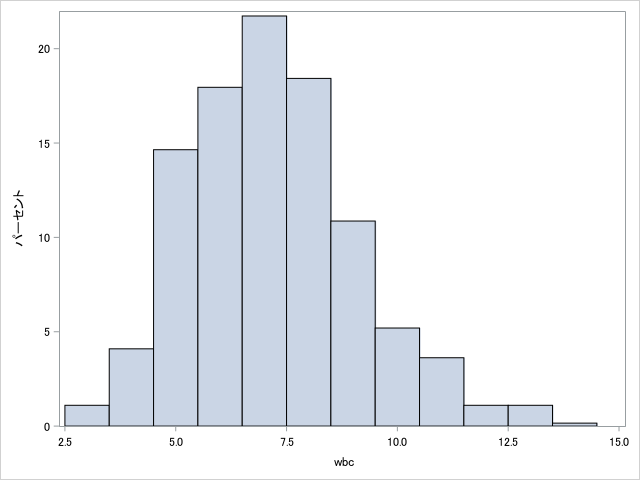

In [13]:
proc sgplot data = phc6089.hem2;
  histogram wbc;
run;

SGPLOTプロシージャには、以下のような一般的な形式があります。

```
proc sgplot data = データセット;
  plot_keyword 変数 / プロットオプション;
run;
```

ここで「PLOT_KEYWORD」はプロットの種類のためのステートメント、「変数」はデータセットからプロットに含まれる変数、「プロットオプション」はプロットを修正するためのオプション引数です。

ボックスプロットを作成するには、横向きのプロットならキーワードに**HBOX**、または縦向きなら**VBOX**を使用します。
<!-- 
The procedure PROC SGPLOT has the general form  

```    
PROC SGPLOT data = data-set;
    PLOT_KEYWORD variables / plot-options;
RUN;
```

where `PLOT_KEYWORD` is the SAS statement for the type of plot you would like to create, _variables_ are the variable(s) from _data-set_ that are in the plot, and _plot-options_ are optional additional parameters to modify the plot.  
To make a boxplot, we would simply use the keyword **HBOX** for a horizontal boxplot or **VBOX** to make a vertical boxplot.  
 -->



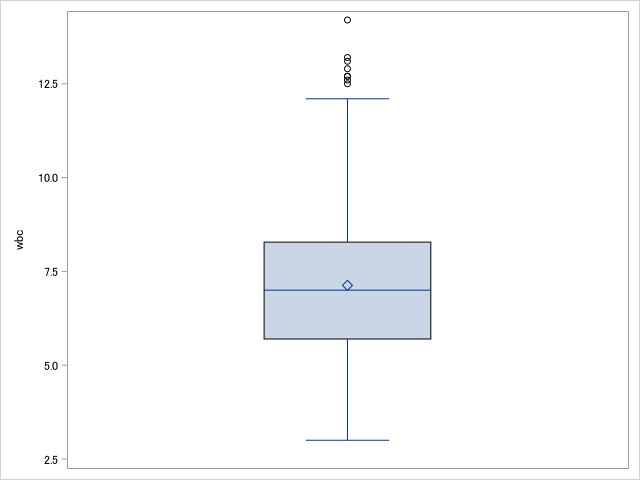

In [14]:
proc sgplot data = phc6089.hem2;
  vbox wbc;
run;

散布図を作成するには、キーワード**SCATTER**を使用します。散布図には2つの変数が必要なので、単一の変数ではなく **X=** と **Y=** を指定する必要があります。


<!-- 
A scatterplot can be created by using the keyword **SCATTER**. This plot requires two variables, so we have the specify **X=** and **Y=** instead of a single variable as we did for HISTOGRAM and VBOX/HBOX.  
-->


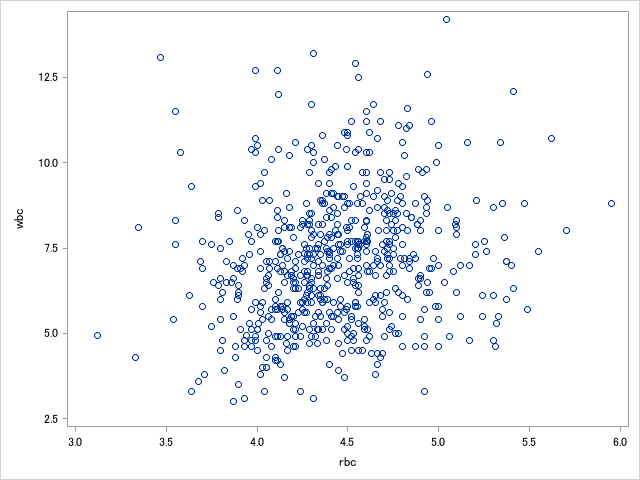

In [15]:
proc sgplot data = phc6089.hem2;
  scatter x=rbc y=wbc;
run;


PROC SGPLOTで利用可能な量的変数の他の標準的なプロットには、以下があります。

* DENSITY - 密度プロットを作成
* SERIES - 線プロットを作成  
* BUBBLE - 散布図の点のサイズを別の第3の変数で決める、バブルプロットを作成

<!-- 
Other standard plots for quantitative variables that are available in PROC SGPLOT include: 

* DENSITY - create a density plot
* SERIES - create a line plot
* BUBBLE - create a bubble plot. This is a scatterplot where the size of the point in a scatterplot is determined by some other third variable.
-->


<!-- 
### Example
A great example of being in a situation in which you need to create a summarized data set is when you want to create an interaction plot. The following program uses data from the ICDB Background data set to illustrate how to create a simple plot to depict whether an interaction exists between two class variables, `sex` and `race`, where we recode race to be white and non-white, when the analysis variable of interest is education level (`ed_level`):  
-->


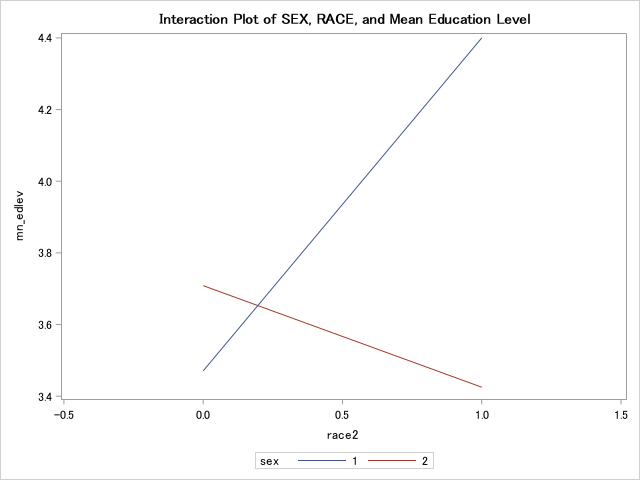

In [16]:
data back;
  set phc6089.back;
  if race = 4 then race2 = 0;
  else race2 = 1;
run;

proc sort data=back out=back;
  by sex race2;
run;
 
proc means data=back noprint;
  by sex race2;
  var ed_level;
  output out=meaned mean=mn_edlev;
run;

title 'Mean Education Level for Sex and Race combinations'; 
proc print data = meaned;   
run;

title 'Interaction Plot of SEX, RACE, and Mean Education Level'; 
proc sgplot data=meaned;  
  series x = race2 y = mn_edlev / group = sex;
  xaxis min = -0.5 max = 1.5;
run;

title ; *reset title;

最初のデータステップでは、「race」の値が4以外のすべての人種をnon-whiteとしてまとめるために、新しい変数「race2」を追加しています。SORTプロシージャでは、BYグループ処理のためのデータセットbackの準備を行っています。MEANSプロシージャは、「sex」「race」の各組み合わせについて平均教育水準(「ed_level」)を計算し、結果を新しいデータセットmeanedに出力しています。PRINTプロシージャは、当然のことながらmeanedデータセットを出力するよう指示しています。

データセットmeanedが作成されたら、データセットの平均値を使ってプロットを作成するだけです。SGPLOTプロシージャは、Y軸に「ed_level」、X軸に「race2」をプロットするよう指示しています。SERIESステートメントの「group=sex」オプションは、SASに2つの異なる線グラフ(1つは男性用、もう1つは女性用)を作成させます。このプロットは、男性(sex=1)の場合、non-whiteの平均教育水準がwhiteよりも高く、一方女性(sex=2)の場合、non-whiteの平均教育水準がwhiteよりも低いことを示しています。ただし、両方の性別のnon-whiteのサンプルサイズが非常に小さいため、このnon-whiteと女性の平均教育水準の差はより多くのデータではなくなる可能性があります。

この種の交互作用を表示する別の方法は、次のコードに示すように、横に並んだボックスプロットを使うことです。

<!-- 
The first DATA step adds a new version of the race variable to collapse all non-white races into a single group due to the low sample size of non-white participants. The SORT procedure prepares the Background dataset for BY-group processing. The MEANS procedure calculates the mean education level ("var ed_level") for each sex race combination ("by sex race"). The OUTPUT statement tells SAS to dump the results into a new dataset called meaned. The PRINT procedure of course tells SAS to print the meaned dataset which is shown above.  
As we'd expect, the dataset contains one row for each sex and race combination. The primary variable is mn_edlev, the average education level of the subjects of that sex and race combination. Onse the meaned datset is created, all we need to do is use the means in teh dataset to create the interaction plot. The SGPLOT procedure tells SAS to plot the mean education level on the y-axis and race on the x-axis. The "group=sex" option of the SERIES statement tells SAS to create two different series plots, one for each gender group. This plots shows that for males (sex=1), the average education level for non-whites is higher than for whites, whereas for females (sex=2), the average education level is lower for non-whites than whites. Note, however, there is a very low sample size for non-whites among both sexes, so this gap in average education level between males and females for non-whites may very well disappear with more data.  
An alternative way to view this type of interaction is with side by side boxplots as the following code illustrates.  
-->


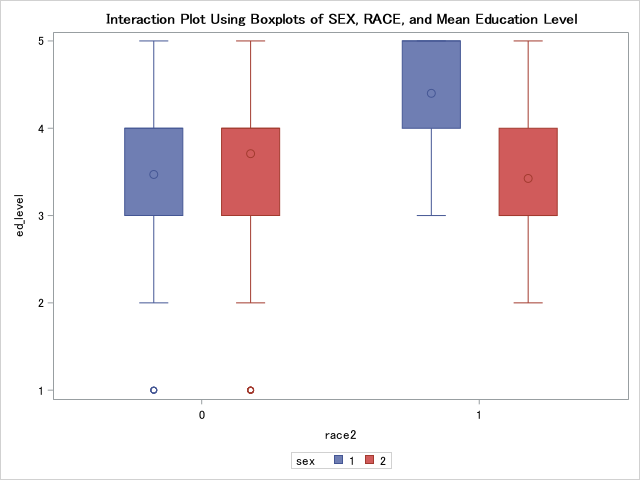

In [17]:
title 'Interaction Plot Using Boxplots of SEX, RACE, and Mean Education Level';
proc sgplot data=back; 
  vbox ed_level / category = race2 group = sex;
  xaxis min = -0.5 max = 1.5;
run;

title ; *reset title;

ボックスプロットを使うと、データのばらつきも確認できます。これは、平均値の違いは統計的に有意ではない可能性が高いことを示しています。

VBOXステートメントでは、「category=」オプションを使用して横に並んだボックスプロットを作成し、次に「group=s」オプションを使用してwhiteとnon-whiteの両方のグループに対して男女別のボックスプロットを作成しました。

<!-- 
With boxplots, we also have a view of the variability in the data, showing that there is lots of overlap between groups. Any differences in the means are most likely not statistically significant.  
In the VBOX statement, we used the "category = race2" option to create side-by-side boxplots and then used the "group=sex" option to get a boxplot for each gender for both the white and non-white groups.  
 -->

### UNIVARIATEプロシージャ  

このセクションでは、UNIVARIATEプロシージャを概要を見ていき、MEANSおよびSUMMARYプロシージャの出力と、それらがどのように異なるかを確認します。

### 例

以下は(ほぼ)最もシンプルなUNIVARIATEプロシージャのコードで、データセット phc6089.hem2の赤血球数「rbc」の単変量解析を行います。

<!-- 
### The UNIVARIATE Procedure

In this section, we take a brief look at the UNIVARIATE procedure just so we can see how its output differs from that of the MEANS and SUMMARY procedures.

### Example

The following UNIVARIATE procedure illustrates the (almost) simplest version of the procedure, in which it tells SAS to perform a univariate analysis on the red blood cell count (`rbc`) variable in the phc6089.hem2 data set:  
-->

In [18]:
title 'Univariate Analysis of RBC';
proc univariate data = phc6089.hem2; 
  var rbc;
run;

最もシンプルなUNIVARIATEプロシージャは、VARステートメントを使っていないものでしょう。今回はデータセットphc6089.hem2の赤血球数の変数「rbc」に対して単変量解析を実行するよう指示しています。

プログラムを開いて実行し、出力を確認して、UNIVARIATEプロシージャが算出する要約統計量の種類を確認しておいてください。出力には、Moments、Basic Statistical Measures、Tests for Location Mu0=0、Quantiles、Extreme Observationsの5つの主要なセクションがあることがわかります。

入門レベルの統計コースを履修済みであれば、出力の内容を理解できるはずです。たとえば、出力によると、データセット内の635人の被験者(N)の平均(Mean)赤血球数は4.435で、標準偏差は0.394です。中央値(50% Median)の赤血球数は4.41です。データセット内の最小赤血球数は3.12(オブザベーション#218)で、最大は5.95(オブザベーション#465)です。

<!-- 
The simplest version of the UNIVARIATE procedure would be one in which no VAR statement is present. Then, SAS would perform a univariate analysis for each numeric variable in the data set. The DATA= option merely tells SAS on which data set you want to do a univariate analysis. As always, if the DATA= option is absent, SAS performs the analysis on the current data set. The VAR statement tells SAS to perform a univariate analysis on the variable `rbc`.  
Launch and run the program and review the output to familiarize yourself with the kinds of summary statistics the univariate procedure calculates. You should see five major sections in the output with the following headings: **Moments** , **Basic Statistical Measures** , **Tests for Location Mu0 = 0** , **Quantiles** , and **Extreme Observations**. These sections are presented in the output shown above.  
With an introductory statistics course in your background, the output should be mostly self-explanatory. For example, the output tells us that the average ("Mean") red blood cell count of the 635 subjects ("N") in the data set is 4.435 with a standard deviation of 0.394. The median ("50% Median") red blood cell count is 4.41. The smallest red blood cell count in the data set is 3.12 (observation #218), while the largest is 5.95 (observation #465).  
-->

### 例

NORMALオプションを指定た場合、VARステートメントで指定した変数が正規分布であるという帰無仮説に対して、4つの検定統計量**Shapiro-Wilk** , **Kolmogorov-Smirnov** , **Cramer-von Mises** と **Anderson-Darling**を算出します。  
PLOTオプションを指定すると、ヒストグラム、箱ひげ図、正規確率プロットをVARステートメントで指定された各変数で出力します。  
同様にBYステートメントも指定した場合はBYグループごとに各変数がプロットされます。  
以下のUNIVARIATEプロシージャではデータセットhem2の変数「rbc」についてNORMALとPLOTオプションを使用しています。

<!-- 
### Example
When you specify the NORMAL option, SAS will compute four different test statistics for the null hypothesis that the values of the variable specified in the VAR statement are a random sample from a normal distribution. The four test statistics calculated and presented in the output are: **Shapiro-Wilk** , **Kolmogorov-Smirnov** , **Cramer-von Mises** , and **Anderson-Darling**.  
When you specify the PLOT option, SAS will produce a histogram, a box plot, and a normal probability plot for each variable specified in the VAR statement.  
If you have a BY statement specified as well, SAS will produce each of these plots for each level of the BY statement.  
The following UNIVARIATE procedure illustrates the NORMAL and PLOT options on the variable rbc of the hematology data set:  
 -->


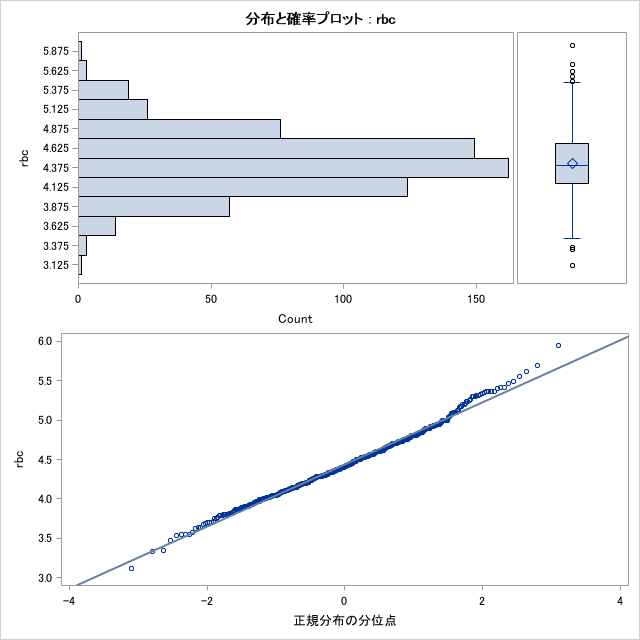

In [19]:
title 'Univariate Analysis of RBC with NORMAL and PLOT Options';
proc univariate data = phc6089.hem2 normal plot;   
  var rbc;
run;

プログラムを開いて実行し、 UNIVARIATEプロシージャのNORMAL、PLOTオプションによる出力を見てみてください。新しいセクションとして**正規性の検定**が追加され、4つの正規性の検定統計量とp値が算出されます。 アウトプットの末尾ではヒストグラムと箱ひげ図を確認できます。

<!-- 
Launch and run the SAS program. Review the output to familiarize yourself with the change in the UNIVARIATE output that arises from the NORMAL and PLOT options. You should see a new section called **Tests for Normality** that contains the four "test for normality" test statistics and corresponding P-values. At the end of the output, you should see the histogram and box plot  
-->

### 例

UNIVARIATEプロシージャでIDステートメントを使用すると、SASは極値として最大と最小から5オブザベーションを、(通常意味のない)オブザベーション番号だけではなく、IDステートメントで指定した変数の値で示します。次のUNIVARIATEプロシージャでは、被験者番号「subj」を使って赤血球数「rbc」の極値を示します。

<!-- 
### Example

When you use the UNIVARIATE procedure's ID statement, SAS uses the values of the variable specified in the ID statement to indicate the five largest and five smallest observations rather than the (usually meaningless) observation number. The following UNIVARIATE procedure uses the subject number (`subj`) to indicate extreme values of red blood cell count (`rbc`):  
-->

In [20]:
title 'Univariate Analysis of RBC with ID Option';
proc univariate data = phc6089.hem2;   
  var rbc;
  id subj;
run;

プログラムを開いて実行します。IDステートメントを使用することによるUNIVARIATEプロシージャ出力の変化について出力を確認してください。前の例では、UNIVARIATEプロシージャの出力はオブザベーション#218が、データセット内で最小の赤血球数(3.12)を持ち、オブザベーション#465が最大(5.95)の赤血球数を持つことを示していました。しかし今回は、被験者番号をID変数("id subj")として使用したため、SASはより役立つ情報を報告しています。被験者220007が最小の赤血球数を持ち、被験者420074が最大の赤血球数を持つと報告されています。  
UNIVARIATEプロシージャはここで扱えるよりもはるかに多くのことができることを知っても驚かないでください。BYステートメントをMEANSおよびSUMMARYプロシージャで使用して入力データセットのオブザベーションをサブグループに分類できるように、UNIVARIATEプロシージャでもBYステートメントを使用できます。また、OUTPUTステートメントをMEANSおよびSUMMARYプロシージャで使用して要約データセットを作成できるように、UNIVARIATEプロシージャでもOUTPUTステートメントを使用できます。UNIVARIATEプロシージャの機能と構文の詳細については、SASヘルプおよびドキュメンテーションを参照してください。

<!-- 
Launch and run the SAS program. Review the output to familiarize yourself with the change in the UNIVARIATE output that arises from using the ID statement. In a previous example, the UNIVARIATE output indicated that observation #218 has the smallest red blood cell count in the data set (3.12), while observation #465 has the largest (5.95). Now, because of the use of the subject number as an ID variable ("id subj"). SAS reports the more helpful information that subject 220007 has the smallest red blood cell count, while subject 420074 has the largest.  
You shouldn't be surprised to learn that the UNIVARIATE procedure can do much more than what we can address now. Just as the BY statement can be used in the MEANS and SUMMARY procedures to categorize the observations in the input data set into subgroups, so can a BY statement be used in the UNIVARIATE procedure. And, just as an OUTPUT statement can be used in the MEANS and SUMMARY procedures to create summarized data sets, so can an OUTPUT statement be used in the UNIVARIATE procedure. For more information about the functionality and syntax of the UNIVARIATE procedure, see the SAS Help and Documentation.  
-->

## カテゴリカルデータの要約  

このセクションでは、FREQプロシージャをカテゴリカルデータの要約と分析のためのツールとして使用方法を確認します。このプロシージャは、記述的なプロシージャであると同時に統計的なプロシージャでもあります。1次元から多次元の度数およびクロス集計表を作成することができます。2次元表の場合、FREQプロシージャはカイ2乗検定と関連尺度も計算します。また、多次元表の場合、FREQプロシージャは層別分析を実行し、層内および層間の統計量を計算します。FREQプロシージャは、定性変数の要約統計量(カウントやパーセンテージなど)をSASデータセットに出力することもできます。

### 基本的な1次元の表

デフォルトでは、FREQプロシージャは、入力データセットの各変数の値ごとに、**度数**、**パーセンテージ**、**累積度数**、**累積パーセンテージ**を含む1次元の表を作成します。変数が文字変数か数値変数かは、FREQプロシージャには関係ありません。数値変数の場合、ごく少数の可能な結果しか持たない離散的な数値変数(きょうだいの数など)か、無限の可能な結果を持つ連続的な数値変数(体重など)かは関係ありません。つまり、デフォルトのFREQプロシージャを使うと、膨大な出力が作成される可能性があります。そのため、デフォルトバージョンはスキップし、TABLESステートメントを使って作成するテーブル数を制限するより実用的な使用方法に移ります。

FREQプロシージャには以下の一般的な形式があります。

<!-- 
## Summarizing Categorical Data

In this section, we'll investigate the FREQ procedure as a tool for summarizing and analyzing categorical data. The procedure is a descriptive procedure, as well as a statistical procedure. It allows you to produce one-way to n-way frequency and cross tabulation tables. For two-way tables, the FREQ procedure also computes chi-square tests and measures of association. And, for n-way tables, the FREQ procedure also performs stratified analyses, computing statistics within as well as across strata. The FREQ procedure can also be used to output summary statistics, such as counts and percentages, to a SAS data set.

### A Basic One-Way Table

By default, the FREQ procedure creates a one-way table that contains the **frequency**, **percent**, **cumulative frequency**, and **cumulative percent** of every value of every variable in the input data set. That every there is italicized with good reason ... the FREQ procedure doesn't care whether the variable is a character variable or a numeric variable. And, if a variable is numeric, the FREQ procedure doesn't care if it is a discrete numeric variable with just a few possible outcomes (number of siblings, say) or a continuous numeric variable with an infinite number of possible outcomes (weight, say). That means then if you rely on the default version of the FREQ procedure, it is possible to create lots and lots and lots of output. That's why we'll skip the default version and will jump right to the more practical version in which you restrict the number of tables SAS creates by using a TABLES statement.

The FREQ procedure takes the following generic form:
-->

In [ ]:
proc freq options;
  tables ... /options;
run;

TABLESステートメントは、作成する特定の度数テーブルを指示します。TABLESステートメントを含めない場合、入力データセットの各変数に対して1次元の度数分布表を作成します。

前のコードからプロシージャオプションとテーブルオプションの2種類のオプションがあることがわかります。プロシージャオプション(典型的な「DATA=」オプションなど)は、PROC FREQステートメントの後に続けて指定します。テーブルオプションは、TABLESステートメントのスラッシュ(/)の後に指定する必要があります。いずれの場合も、任意の数のオプションを指定できます。   

ここでは、ICDBの背景データセットを使ってFREQプロシージャについて説明します。データセットをPC上の任意の場所に保存してください。

<!-- 
The TABLES statement tells SAS the specific frequency table(s) that you want to create. If you don't include a TABLES statement, then SAS creates a one-way frequency table for every variable in your input data set.

As you can see, there are two types of options, namely procedure options and table options. Procedure options, such as the typical "DATA=" option, must follow the PROC FREQ statement. Table options must be specified after a forward slash (/) in the TABLES statement. In either case, you can specify as many options as you would like.

Throughout this lesson, we'll use the ICDB background data set to illustrate the FREQ procedure. Be sure to save the data set to a convenient location on your computer.
-->

### 例

次のFREQプロシージャは最もシンプルな実行例で、何の処理もされていない変数「sex」の一次元の度数分布表を作成します。：  

<!-- 
### Example

The following FREQ procedure illustrates the simplest practical example, namely a one-way frequency table of the variable sex, with no bells or whistles added:  
 -->

In [21]:
LIBNAME phc6089 '/folders/myfolders/SAS_Notes/data/';

title 'Frequency Count of SEX'; 
proc freq data=phc6089.back;   
  tables sex;
run;

プログラムを開いて、LIBNAMEステートメントをデータセットbackの保存先に合わせて修正し、実行して出力を確認いてください。
このような基本的な一次元の度数分布表が表示されるはずで、変数「sex」の各値の度数、パーセンテージ、累積度数、累積パーセンテージが出力されます。  
この出力によると、例としてICDB研究の被験者の56人、8.78%が男性(sex=1)であることがわかります。

<!-- 
Launch the SAS program and edit the LIBNAME statement so that it reflects the location in which you saved the background data set. Then, run the program and review the output. You should see something along the lines of this basic one-way frequency table, in which, as promised, SAS reports the frequency, percent, cumulative frequency, and cumulative percent of each value of the sex variable.  
This output tells us, for example, that 56 or 8.78% of the subjects in the ICDB Study are male (coded as `sex = 1`).  
-->

### 例

繰り返しになりますが、デフォルトではSASは度数、パーセント、累積度数、累積パーセントを出力します。TABLEステートメントのNOCUMオプションは、一次元度数分布表の累積度数と累積パーセンテージが出力されないようします。以下NOCUMオプションの例：  

<!-- 
### Example

Again, by default, SAS outputs frequency counts, percents, cumulative frequencies, and cumulative percents. The NOCUM table option suppresses the printing of the cumulative frequencies and cumulative percentages for one-way frequency tables. The following SAS code illustrates the NOCUM table option:  
 -->

In [22]:
title 'Frequency Count of SEX: No Cumulative Stats';
proc freq data=phc6089.back;    
  tables sex / nocum;
run;

プログラムを開いてして実行し、確かに累積度数と累積パーセンテージが出力されていないことを確認してください。表には各性別の数とパーセンテージのみが含まれています。
FREQプロシージャで、TABLESステートメントに多くの変数を指定できます。リストが長い場合、リストを指定するための短縮形を使用できます。TABLESステートメントで番号付きの複数の変数を以下のように指定できます。

```
tables var1-var4;
```

このように指定すると「var1」、「var2」、「var3」、「var4」という4つの変数に対して１次元の度数分布表を作成します。代わりにTABLESステートメントでデータセット内の変数の位置で複数の変数を指定する場合、

```
tables sex--race;  
```

のようにすると、変数「sex」と「race」の間にあるすべての変数(この場合のデータセットbackでは「sex」、「state」、「country」、「race」の変数)に対して一次元の度数分布表を作成します。データセット内の変数の位置がわからない場合は、CONTENTSプロシージャのVARNUMオプションを使用してデータセット内の変数の位置を確認できます。(2つのダッシュはタイプミスではありません。データセット内の変数の位置による複数の変数の指定には2つのダッシュが必要です。)  

TABLESステートメントに複数の変数を指定する代わりに、FREQプロシージャに複数のTABLESステートメントを指定することができます。複数のテーブルを作成させる方法に関係なく、PAGEオプションを使って1ページ1テーブルのみを出力させることができます。それ以外の場合、FREQプロシージャはスペースに余裕があれば、複数の表を1ページに出力します。


<!-- 
Launch and run the SAS program. Review the output to convince yourself that indeed the cumulative frequencies and cumulative percentages are not printed in the table. The table contains only the number and percentage of each `sex`.  
In any FREQ procedure, you can specify many variables in a TABLES statement. If the list is long, you may be able to use a shortcut to specify the list of variables. If you specify a TABLES statement using a numbered range of variables, such as:  

```    
tables var1-var4;
```

then SAS will create a one-way frequency table for the four variables named var1, var2, var3, and var4. If instead in your TABLES statement, you specify a range of variables by their position in the data set, such as:  

``` 
tables sex--race;
```

then SAS will create a one-way frequency table for every variable that appears between the `sex` and `race` variables in the data set, namely in the case of the background data set, `sex`, `state`, `country`, and `race`. Recall that if you're not sure of the position of the variables in your data set, you can use the VARNUM option of the CONTENTS procedure to determine the position of the variables in a data set. (Incidentally, that is not a typo in the second TABLES statement ... it takes two dashes to specify a range of variables by their position in the data set.)  
Rather than specifying many variables in a TABLES statement, you can specify many TABLES statements in a FREQ procedure. However you tell SAS to make multiple tables, you can use the PAGE option to tell SAS to print only one table per page. Otherwise, the FREQ procedure prints multiple tables per page as space permits.  
-->

### 例

以下のプログラムはPAGEオプションと合わせて2つの１次元の度数分布表の作成します。

<!--
### Example

The following SAS program illustrates the creation of two one-way frequency tables in conjunction with the PAGE option:  
-->

In [23]:
title 'Frequency Count of SEX and RACE';
proc freq data=phc6089.back page;   
  tables sex race;
run;

プログラムを開いて実行し出力を確認すると、2つの一次元の度数分布表(1つはカテゴリカル変数「sex」に対し、もう1つはカテゴリカル変数「race」に対し)を作成していることがわかります。PAGEオプションが指定されたため、各表が個別のページに出力されているはずです。最初のページには変数「sex」の表、2ページ目には変数「race」の表が出力されます。

TABLESステートメントの変数の順序が出力の順序を決めることにも注目してください。

<!-- 
Launch and run the SAS program. Review the output to convince yourself that indeed SAS creates two one-way frequency tables — one for the categorical variable sex and the other for the categorical variable race. Because the PAGE option was invoked, each table should be printed on a separate page. The first page should contain the frequency table for the sex variable, and the second page should contain the frequency table for the race variable  
Incidentally, you might also want to notice that, not surprisingly, the order in which the variables appear in the TABLES statement determines the order in which they appear in the output.
-->

### 例

他のSASプロシージャと同様に、BYステートメントを使用して、BYグループの各水準に対して算出をするように指定できます。以下のプログラムは、変数「ed_level」に対して、変数「sex」の各水準に対する一次元の度数分布表を作成します：  

<!-- 
### Example

As is the case for many SAS procedures, you can use a BY statement to tell SAS to perform an operation for each level of a BY group. The following program tells SAS to create a one-way frequency table for the variable ed_level for each level of the variable sex:  
-->

In [24]:
proc sort data=phc6089.back out=s_back;
  by sex;
run;

title 'Frequency Count of Education Level within Each Level of Sex';    
proc freq data=s_back;    
  tables ed_level;
  by sex;
run;

他の場合と同様にSORTプロシージャは、背景データセットをBYグループ処理用に並べ替えるだけです。SORTプロシージャは、データセットphc6089.backを「sex」で並べ替え、結果を新しいデータセットs_backに格納します。次に、FREQプロシージャではBYステートメント(「by sex」)とTABLESステートメント(「tables ed_level」)の両方が呼び出されています。プログラムを開いて実行し、出力を確認すると、教育水準「ed_level」の一次元の度数分布表を2つ作成していることがわかります。1つは男性(sex=1)、もう1つは女性(sex=2)の表です。

これまでの例ではすべて欠損値が存在しませんでした。欠損値が存在する場合、SASはデフォルトで要求された度数分布表から欠損値を除外します。代わりに、表の下に**Frequency Missing**を出力します。代わりに、TABLEステートメントのオプションMISSINGを使って、欠損値を非欠損値のように扱うことで、パーセンテージやその他の統計量の計算に含めるよう指示することができます。またはMISSPRINTオプションを使って、度数の出力時には欠損値を非欠損値として扱い、統計量の計算には含めないよう指示することもできます。


<!-- 
As is always the case, the SORT procedure merely prepares the background data set for BY-group processing. The SORT procedure tells SAS to sort the phc6089.back data set by sex, and to store the results in a new data set called s_back. Then, as you can see, the FREQ procedure is invoked with a BY statement ("by sex") in addition to the TABLES statement ("tables ed_level"). Launch and run the SAS program. Review the output to convince yourself that SAS creates two one-way frequency tables of education level (ed_level) — one for males (sex = 1) and one for females (sex = 2).  
So far, in each of the examples we have looked at, no missing values existed. When they do exist, SAS by default excludes them from your requested frequency tables. Instead, SAS prints the " **Frequency Missing** " below each table. You can instead opt to use the MISSING tables option, in which you tell SAS to instead treat missing values as nonmissing values, and to therefore include them in the calculation of percentages and other statistics. Or you can opt to use the MISSPRINT option to tell SAS to treat missing values as nonmissing values when printing the frequencies but do not include them in the calculation of the statistics.  
-->

### 例

以下のプログラムは背景データセットの変数「state」にMISSINGとMISSPRINTオプションを使用します。

<!-- 
### Example

The following SAS program illustrates the MISSING and MISSPRINT options on the variable state in the background data set.  
-->

In [25]:
title 'One-way Table of State: with MISSING Option';
proc freq data=phc6089.back;   
  tables state / missing;
  where state <= 5; *To keep the output small;
run;

プログラムを開いて実行し出力を確認すると、TABLEステートメントのオプションMISSINGを使用したFREQプロシージャの出力は上の表のようになります。最初の行は、42人の被験者が居住の州を回答していないことを示しています。MISSINGオプションが使用されたため、この42人がデータセットの6.58%を占めていることも示しています。この42人は累積パーセンテージの計算に含まれています。  
一方、TABLEステートメントのオプションMISSPRINTを使用したFREQプロシージャの出力の最初の数行は次のようになるはずです。
<!-- 
Launch and run the SAS program, and review the resulting output. The output from the FREQ procedure with the MISSING tables option should look the table shown above. As you can see, the first row tells us that 42 subjects did not report the state in which they live. Because the MISSING option was used, SAS also tells us the 42 subjects comprise 6.58% of the subjects in the data set. SAS also includes the 42 subjects in the calculation of the cumulative percentage.  
On the other hand, the first few rows of output from the FREQ procedure with the MISSPRINT tables option should look something like this.  
-->

In [26]:
title 'one-way table of state: with missprint option';
proc freq data=phc6089.back;   
  tables state/missprint;
  where state <= 5; *to keep the output small;
run;

最初の行では、再び42人の被験者が居住州を回答していないことが示されています。ただしこの場合、MISSPRINTオプションが指定されたため、他の項目は出力されません。つまりこれらの被験者をパーセンテージ、累積度数、累積パーセンテージの計算には含まれていません。  

<!-- 
As you can see, the first row again tells us that 42 subjects did not report the state in which they live. In this case, however, because the MISSPRINT option was specified, SAS stops there. That is, SAS does not include the subjects in any of its calculations of the percent, cumulative frequency or cumulative percent.  
-->

### 2次元および多次元の表

これまででは、FREQプロシージャを使って1次元の数表のみを作成してきました。ただし、複数の変数の度数からなるクロス集計表を作成するほうが役立つ場合があります。たとえば、新しい治療で副作用が発現する割合が年齢層間でどのように異なるかを知りたい場合、2つのカテゴリカル変数―年齢層(18-29歳、30-44歳、45-54歳、55-70歳、70歳超など)と副作用(はい または いいえ)の2次元の度数分布表を作成する必要があります。このような表をこのセクションでは扱います。

### 例

以下のFREQプロシージャは2次元の度数分布表を作成する最もシンプルなもので、変数「sex」、「ed_level」について余分なものを含まない表を出力します。
<!-- 
### Two-way and N-way Tables

So far, we have only used the FREQ procedure to create one-way frequency tables. However, it is often helpful to create crosstabulation tables in which the frequencies are determined for more than one variable at a time. For example, if we were interested in the percentage of individuals that experience side effects on our new treatment and how this differs between different age groups, then we would need to create a two-way contigency table between the two categorical variables age group (say with the values 18-29, 30-44, 45-54, 55-70, and more than 70) and side effects (yes or no). We'll investigate such tables in this section.

### Example

The following FREQ procedure illustrates the simplest example of telling SAS to create a two-way table, for the variables `sex` and `ed_level`, with no bells and whistles added.  
-->

In [27]:
title 'Crosstabulation of Education Level and Sex';
proc freq data=phc6089.back;   
  tables ed_level*sex;
run;

これまでに見ているように、教育水準と性別の2変量の度数分布表を作成するよう指示するには、TABLESステートメントで2つの変数を*でつなげます。  
プログラムを開いて実行し、2次元の度数分布表が作成されたことを確認してください。  
一般的に、\*の前の変数の値が表の行を、\*の後の変数の値が表の列となります。この場合、「ed_level」が\*の前にあるので表の行、「sex」が\*の後にあるのでが表の列となります。  
2次元の度数分布表を作成する際、デフォルトでは各セルにセルの度数、全体に対するセルの割合、行度数に対するセル割合、列度数に対するセル割合が表示されます。表の左上にあるガイドを確認して、セルの数値がそれぞれ何を表しているかを確認してください。ここでは、(i, j)セルの最初の数値が「ed_level」がiで「sex」がjである被験者数、2番目の数値がその割合、3番目の数値が「ed_level」がiの被験者のうち「sex」がjである割合、4番目の数値が「sex」がjの被験者のうち「ed_level」がiである割合を表していることがわかります。 例えば、ed_level=4かつsex=2のセルについては、229人の被験者がその条件を満たし、全体の35.89%を占め、ed_level=4の被験者の91.97%がsex=2であり、sex=2の被験者の39.35%がed_level=4であることがわかります。

**ショートカットについて** 多くの2次元の度数分布表を作成する必要がある場合は、次のようなショートカットを使うことができます。

```
tables a*(b c);
```

このステートメントは、a\*bとa\*cの2つの2次元の度数分布表を作成します。

```
tables (a b)*(c d);
```

このステートメントは、a\*c、b\*c、a\*d、b\*dの4つの2次元の度数分布表を作成します。

```
tables (a b c)*d;
```

このステートメントは、a\*d、b\*d、c\*dの3つの2次元の度数分布表を作成します。



<!-- 
As you can see, to tell SAS to create a two-way table of `ed_level` and `sex`, we merely use an asterisk (*) to join the two variables in the TABLES statement.
Launch and run the SAS program. Review the output to convince yourself that SAS created the requested two-way table. In general, the values of the variable appearing before the asterisk form the rows of the table, and the values of the variable appearing after the asterisk form the columns of the table. In this case, since `ed_level` appears before the asterisk in the TABLES statement, its values form the rows of the table. And, since `sex` appears after the asterisk, its values form the columns of the table.  
When SAS creates two-way tables, each cell of the table contains, by default, the cell frequency, the cell percentage of the total frequency, the cell percentage of the row frequency, and the cell percentage of the column frequency. You might want to review the numbers in each of the cells of the table to make sure you understand what is what. In the upper left-hand corner of the table, SAS always prints a guide to the numbers appearing in each of the cells in the table. Here, SAS tells us that the first number in cell (i,j) is the number of subjects of `ed_level i` and `sex j`; the second number in cell (i,j) is the percentage of subjects of `ed_level i` and `sex j`; the third number in cell (i,j) is the percentage of subjects who are `sex j` given that they are `ed_level i`; and the fourth number in cell (i,j) is the percentage of subjects who are `ed_level i` given that they are `sex j`. For example, for the cell in which `ed_level = 4` and `sex = 2`, SAS tells us that: 229 of the subjects in the data set are ed_level 4 and sex 2; 35.89% of the subjects in the data set are `ed_level` 4 and `sex` 2; 91.97% of the subjects in the data set who are `ed_level` 4 are `sex` 2; and 39.35% of the subjects in the data set who are `sex` 2 are `ed_level` 4.  
**A little note about shortcuts.** If you have many different two-way tables to create, you can use a variety of shortcuts. For example, the TABLES statement:  

```    
tables a*(b c);
```

tells SAS to create a two-way table between variables a and b (a * b) and a two-way table between variables `a` and `c` (a * c). The TABLES statement:  

``` 
tables (a b)*(c d);
```

tells SAS to create four two-way tables, namely: a * c, b * c, a * d, and b * d. The TABLES statement:  
    

```
tables (a b c)*d;
```

tells SAS to create three two-way tables, namely: a * d, b * d, and c * d.  
-->

### 例

3変量以上の頻度分析を行う場合、FREQプロシージャを使って多次元の度数分布表を作成することができます。その場合、他の変数のそれぞれの水準ごとに2次元の度数分布表が作成されます。次のプログラムは、「sex」、「job_chng」、「ed_level」の3次元の度数分布表を作成します。

<!-- 
### Example

For a frequency analysis of more than two variables, we can use the FREQ procedure to create n-way crosstabulation tables. In that case, a series of two-way tables is created, with a table for each level of the other variable(s). The following program creates a three-way table of `sex`, `job_chng`, and `ed_level`:  
-->

In [28]:
title '3-way Table of Sex, Job Change, and Ed. Level';
proc freq data=phc6089.back;   
  tables sex*job_chng*ed_level;
run;

3次元の度数分布表を作成するためには、TABLESステートメントで3つの変数を*でつなげます。多次元の度数分布表では変数の順序が重要で、TABLESステートメントの最後から2番目と最後の変数が2次元の度数分布表の行と列となります。それより前の変数は、2次元の度数分布表を層別します。したがって、この場合はsex=1のときとsex=2のときで2つのj「ob_chng」と「ed_level」の２次元の度数分表が作成されます。  
プログラムを開いて実行し、出力をから3次元の度数分布表が説明通りに作成されたことを確認してください。sex=1のときとsex=2のときの2つの「job_chng」と「ed_level」の2次元の度数分布表が作成されているはずです。  
おそらく言うまでもありませんが、一般的に多次元の度数分布表は大量の出力を生成します。

<!-- 
As you can see, to tell SAS to create a three-way table of sex, job_chng, and ed_level, we use an asterisk (*) to join the three variables in the TABLES statement. The order of the variables is important. In n-way tables, the last two variables of the TABLES statement become the rows and columns of the two-way tables. Variables that precede the last two variables in the TABLES statement stratify the crosstabulation tables. So, in this case, we should expect SAS to create two two-way tables of `job_chng` and `ed_level`, one for when `sex = 1` and one for when `sex = 2`.  
Launch and run the SAS program, and review the output to convince yourself that SAS created the three-way table as described. You should see that, indeed, SAS created one two-way table of `job_chng` and `ed_level` for when `sex = 1`, and one two-way table of `job_chng` and `ed_level` for when `sex = 2`.  
It probably goes without saying that, in general, n-way tables can generate lots of output.  
-->


### セルの統計量

既に見たように、2次元の度数分布表を作成する際、デフォルトではセル度数、(結合)セル割合、条件付き行割合、条件付き列割合がセルに表示されます。いつものように、デフォルトの設定で実行する必要はありません。デフォルトで表示される統計量の一部を出力しないようにしたり、他の統計量を出力することができます。

多変量の度数分布表の場合、次のTABLEステートメントのオプションを使うことで、デフォルトのセルの出力を抑制できます。

* **NOFREQ**: セル度数の表示を抑制
* **NOROW**: 行割合の表示を抑制
* **NOCOL**: 列割合の表示を抑制
* **NOPERCENT**: (結合)セル割合の表示を抑制

### 例

次のプログラムはNOROW、NOCOL、NOPERCENTテーブルオプションの使用例です。



<!-- 
### Cell Statistics

As you now know, when SAS creates two-way tables, each cell of the table contains, by default, the cell frequency, the (joint) cell percentage, the conditional row percentage, and the conditional column percentage. As usual, you don't have to accept the default ... you can tell SAS to suppress some of the default statistics it displays ... or you can tell SAS to display alternative statistics.

For n-way crosstabulations, you can suppress the default output in each of the cells by using any (or all) of the following table options:

* **NOFREQ** suppresses the printing of the cell freqencies
* **NOROW** suppresses the printing of the row percentages
* **NOCOL** suppresses the printing of the column percentages, and
* **NOPERCENT** suppresses the printing of the (joint) cell percentages.

### Example

The following SAS program illustrates the NOROW, NOCOL, and NOPERCENT table options:  
-->

In [29]:
title 'Crosstabulation of SEX and RACE: No percents';
proc freq data=phc6089.back;   
  tables race*sex / norow nocol nopercent;
run;

プログラムを開いて実行し、出力を確認すると、行割合、列割合、セル割合が表示されなくなっていることがわかります。また、表の左上のガイドを変更され、各セルに表示される値がセル度数のみであることを示していることにも注目してください。

出力を抑制する代わりに、次のオプションを使って各セルに追加の出力を要求することもできます。

* EXPECTED: 独立の帰無仮説の下での期待セル度数を表示
* DEVIATION: セル度数と期待セル度数(独立の帰無仮説の下)の偏差を表示
* CELLCHI2: 合計カイ2乗統計量に対するセルの寄与度を表示  

つまり、CELLCHI2は(度数 - 期待値)^2 / 期待値で定義されます。


<!-- 
Launch and run the SAS program. Review the output to convince yourself that SAS did indeed suppress the default row percentages, column percentages, and cell percentages. Note, too, that SAS changed the guide in the upper left-hand corner of the table to reflect the new situation — the guide now tells us that the lone number reported in each cell is the cell frequency.  
Instead of suppressing output in an n-way table, we can request additional output in each of the cells by using the following options:  
* EXPECTED, to print the expected cell frequencies under the null hypothesis of independence
* DEVIATION, to print the deviation of the cell frequency from the expected cell frequency (under the null hypothesis of independence)
* CELLCHI2, to print each cell's contribution to the total chi-squared statistic

That is, CELLCHI2 is defined as: CELLCHI2 = (frequency - expected)2⁄expected.  
-->

### 例

「race と「sex」の2次元の度数分布表を作成する際に、次のFREQプロシージャは統計量EXPECTEDとCELLCHI2を出力し、同時に(結合)、行、列の割合の表示を抑制しています。


<!-- 
### Example

In creating the two-way table between race and sex, the following FREQ procedure requests that the EXPECTED and CELLCHI2 statistics be printed, while at the same time suppressing the printing of the joint, row, and column percentages:  
-->

In [30]:
title 'Crosstabulation of SEX and RACE: With Expecteds';
proc freq data=phc6089.back;  
  tables race*sex / expected cellchi2 norow nocol nopercent;
run;

プログラムを開いて実行し、出力を確認すると、(結合)、行、列の割合の表示が抑制され、代わりに期待セル度数とセルのカイ2乗統計量への寄与度が各セルに追加されていることがわかります。また表の左上のガイドが変更され、各セルの2番目の値が期待セル度数、3番目の値がセルのカイ2乗統計量への寄与度であることを示していることにも注目してください。


<!-- 
Launch and run the SAS program. Review the output to convince yourself that SAS did indeed suppress the printing of the joint, row, and column percentages, while adding the expected cell frequencies, as well as the cell's contribution to the chi-square statistic, to the cell output. Note, again, that SAS changed the guide in the upper left-hand corner of the table to reflect the new situation — the guide now tells us that the second number in each cell is the expected cell frequency and the third number is the cell's contribution to the chi-square statistic.  
-->

### 表の形式変更

3変数以上を指定すると、多次元の度数分布表のレベルの組み合わせが多くなり、出力が肥大化する可能性があります。そのような多量で複雑な度数分布表は、リスト形式で表示した方が読みやすくなります。度数分布表をデフォルトの表形式ではなくリスト形式で生成するには、TABLEステートメントのオプションLISTを指定します。

### 例 

次のFREQプロシージャではLISTオプションを使用しています。


<!-- 
### Changing the Table Format

When three or more variables are specified, the multiple levels of n-way tables can produce lots of output. Such bulky and complex crosstabulations are often easier to read as a continuous list. To tell SAS to generate list output for crosstabulations rather than the default tables, simply use the LIST tables option.

### Example

The following FREQ procedure illustrates the LIST option:  
-->

In [31]:
title 'Crosstabulation of SEX and RACE: In List Format';
proc freq data=phc6089.back;  
  tables sex*race/list;
run;

プログラムを開いて実行し、出力を確認すると、2次元の度数分布表を作成する代わりに、要求された2変量の度数分布表をリスト形式で出力していることがわかります。行割合と列割合が不要な場合は、このリスト形式がいいでしょう(リスト形式ではこれらの割合は報告されません)。  
補足として、LISTオプションは、TABLESステートメントで統計的検定や関連性の尺度を出力に含めるよう指定した場合は使用できません(これらの検定や尺度については後で説明します)。また、EXPECTEDオプションを指定しても、LISTオプションが指定されている場合は期待セル度数は出力されません。  
LISTオプションの代替手段としてCROSSLISTテーブルオプションがあります。TABLESステートメントにCROSSLISTオプションを追加すると、標準のOutput Delivery System(ODS)列形式で度数分布表を出力します。この利点はODSについて学ぶまでよくわからないかもしれません。このオプションは、TEMPLATEプロシージャを使ってカスタマイズできる表を作成します。まずは、CROSSLISTオプションを使った例で出力の見た目を確認してみましょう。


<!-- 
Launch and run the SAS program. Review the output to convince yourself that rather than creating a two-way table, SAS prints the requested two-way table as a list. I tend to prefer the LIST format for such cross-tabulations, as long as I'm not in need of the (conditional) row and column percentages (which, as you can see, are not reported in LIST format).
Incidentally, the LIST option cannot be used when the TABLES statement requests statistical tests or measures of association to be included in the output. (We'll be discussing such tests and measures later in this lesson.) Also, expected cell frequencies are not printed when the LIST option is specified, even if the EXPECTED option is invoked.
An alternative to the LIST option is the CROSSLIST table option. When you add the CROSSLIST option to your TABLES statement, SAS displays crosstabulation tables in the standard Output Delivery System (ODS) column format. The benefit of doing so probably won't make much sense until we learn about ODS later. The option creates a table that has a table definition that you can customize by using the TEMPLATE procedure. For now, let's just be satisfied with looking at an example to see what the output looks like when you use the CROSSLIST option.
-->

### 例

次のFREQプロシージャではCROSSLISTオプションを使用しています。

<!-- 
### Example

The following FREQ procedure illustrates the CROSSLIST option:  
-->

In [32]:
title 'Crosstabulation of SEX and RACE: In Crosslist Format';
proc freq data=phc6089.back;   
  tables sex*race/crosslist;
run;

プログラムを開いて実行し、出力からCROSSLISTオプションを使った出力を確認してみてください。

<!-- 
Launch and run the SAS program, and review the output to familiarize yourself with the appearance of the output when you use the CROSSLIST option.
-->

### 出力データセットの作成  

UNIVARIATEプロシージャ、MEANSプロシージャ、SUMMARYプロシージャを使って数値変数の要約統計量を含む新しいデータセットを作成できるのと同様に、FREQプロシージャを使ってカテゴリ変数の集計統計量を含む新しいデータセットを作成することができます。これはデータの操作と後の分析において非常に有用なツールです。

### 例

次のFREQプロシージャは、変数「sex」と「race」の組み合わせごとの度数と割合を含む一時データセットsexfreqを作成します。


<!-- 
### Creating Output Datasets

Just as the UNIVARIATE, MEANS and SUMMARY procedures can be used to create new SAS data sets containing summary statistics of numeric variables, the FREQ procedure can be used to create new SAS data sets containing summary statistics of categorical variables. This can be a very useful tool when manipulating and subsequently analyzing data.

### Example

The following FREQ procedure tells SAS to create an output data set which contains the counts and percentages for each combination of the variables `sex` and `race`:  
-->

In [33]:
proc freq data=phc6089.back;
   tables sex*race / out = sexfreq noprint;
run;

title 'Output Dataset: SEXFREQ'; 
proc print data = sexfreq;  
run;

NOPRINTオプションは、`sex*race`の2次元の度数分布表の出力を抑制するよう指示します。代わりに、結果がOUT=テーブルオプションで指定された一時データセットsexfreqに出力されます。OUT=オプションのデータセットが現在のデータセットになります。したがって、PRINTプロシージャにデータセット名を指定するDATA=オプションがないため、現在のデータセット、つまりsexfreqを出力します。  
ログラムを実行し、出力を確認すると、データセットsexfreqには、データセットに含まれる「sex」と「race」の組み合わせごとに1レコードずつが含まれていることがわかります。また、このデータセットには4つの変数「sex」、「race」と、該当の性別・人種の被験者の数および割合「COUNT」、「PERCENT」が含まれています。

<!--
The NOPRINT tables option tells SAS to suppress printing the two-way crosstabulation of `sex*race`. Instead, the results are dumped to the temporary data set `sexfreq` that is specified in the OUT= tables option. The data set in the OUT= option becomes the current data set. Therefore, since the PRINT procedure does not have a DATA= option to tell SAS the name of the data set to print, SAS prints the current data set, namely `sexfreq`.  
Launch and run the SAS program. Review the output to convince yourself that the sexfreq data set contains one record for each combination of sex and race that occurs in the data set. And, note that the data set contains four variables, `sex`, `race`, `COUNT` (whose value is the number of subjects in the data set of that sex and race), and `PERCENT` (whose value is the percentage of subjects in the data set of that sex and race).  
-->

### 例

TABLEステートメントのオプションSPARSEは、水準の組み合わせが存在しないときでも、すべての可能な組み合わせの水準についての情報を出力します。このオプションは、LISTオプションの出力と出力データセットにのみ影響します。次のコードは、SPARSEオプションを使って出力データセットsexfreqを作成します。

<!-- 
### Example

The SPARSE tables option tells SAS to print information about all possible combinations of levels of the variables in the table request, even when some combinations of levels do not occur in the data. **This option affects printouts under the LIST option and output data sets only**. The following SAS code illustrates use of the SPARSE option in the creation of an output data set called `sexfreq`:  
-->

In [34]:
proc freq data=phc6089.back;
  tables sex*race / out = sexfreq noprint sparse;
run;

title 'Output Dataset: SEXFREQ with SPARSE option'; 
proc print data = sexfreq;  
run;

前のコードとの唯一の違いは、SPARSEオプションが含まれている点です。このプログラムを開いて実行し、出力を確認すると、データセットsexfreqには、組み合わせがデータセット内に存在するかどうかに関係なく、「sex」と「race」のすべての可能な組み合わせごとに1レコードずつ含まれていることがわかります。つまり、2つの性別と8つの人種があるため、データセットsexfreqには16レコード(すべての組み合わせ)が含まれています。例えば、sex=1かつrace=1のレコードでは、その組み合わせの被験者はデータセット内に存在しないため(COUNT=0)となっています。


<!-- 
The only difference between this code and the previous code is the inclusion of the SPARSE option. Launch and run the SAS program. Review the output to convince yourself that the `sexfreq` data set now contains one record for each possible combination of `sex` and `race` regardless of whether or not the combination occurs in the data set. That is, since there are 2 sexes and 8 races, the `sexfreq` data set contains 16 records — one for each of the combinations. For example, there is now a record in the `sexfreq` data set corresponding to sex = 1 and race = 1 even though there are no subjects in the data set of that sex and race combination (`COUNT = 0`).  
-->

## 演習 

この演習では、自転車レーンのデータ(Bike_Lanes.csv)を使用します。(データについてはREADME参照)

1. Baltimoreにはいくつの自転車レーンがありますか?各観測値/行が異なる自転車レーンであると想定できます。
2. Baltimoreにある自転車レーンの総延長距離は(a)フィート数と(b)マイル数でいくらですか?(変数「length」が延長距離で単位はフィート、1マイルは5280フィート)
3. 自転車レーンの種類(type)は何種類ありますか?最も多い種類と(b)平均レーン長が最も長い種類はどれですか?  
4. 自転車レーンはいくつのプロジェクト(project)に分かれていますか?最も平均レーン長が長いプロジェクトカテゴリはどれですか?
5. 設置された年ごとの自転車レーンの平均延長距離はどのくらいですか?(「dateInstalled」が0の場合は先に値を.としてください)
6. 自転車レーンの長さ(length)の分布を(a)統計量、(b)グラフにより表してください。
7. 自転車レーンの長さの分布を(a)type、(b)numLanesごとに層別化して、統計量とグラフに表してください。


<!-- 
## Exercises

For these exercises, we will use the bike lanes dataset ([source](data.baltimorecity.gov/Transportation/Bike-Lanes/xzfj-gyms)), Bike_Lanes.csv. You can download this dataset from the course webpage.

1. How many bike lanes are currently in Baltimore? You can assume that each observation/row is a different bike lane.
2. How many (a) feet and (b) miles of total bike lanes are currently in Baltimore? (The length variable provides the length in feet.)
3. How many types (type) bike lanes are there? Which type (a) occurs the most and (b) has the longest average bike lane length?
4. How many different projects (project) do the bike lanes fall into? Which project category has the longest average bike lane length?
5. What was the average bike lane length per year that they were installed? (Be sure to first set dateInstalled to . if it is equal to zero.)
6. (a) Numerically and (b) graphically describe the distribution of bike lane lengths (length).
7. Describe the distribution of bike lane lengths numerically and graphically after stratifying them by (a) type and then by (b) number of lanes (numLanes).
-->
